In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [28]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
vehicle_data = pd.read_csv(r'C:\Users\Javier Alexander Gar\Downloads\Mosquera tareas\ANÁLISIS DE DATOS\Tarea 3\DatasetVehicle\car data.csv')

# Ver las primeras filas del dataset
print("Primeras filas del dataset:")
print(vehicle_data.head())

# Descripción estadística de las variables
print("\nDescripción estadística:")
print(vehicle_data.describe())

# Información sobre los tipos de datos
print("\nInformación del dataset:")
print(vehicle_data.info())

# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(vehicle_data.isnull().sum())

Primeras filas del dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Descripción estadística:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.

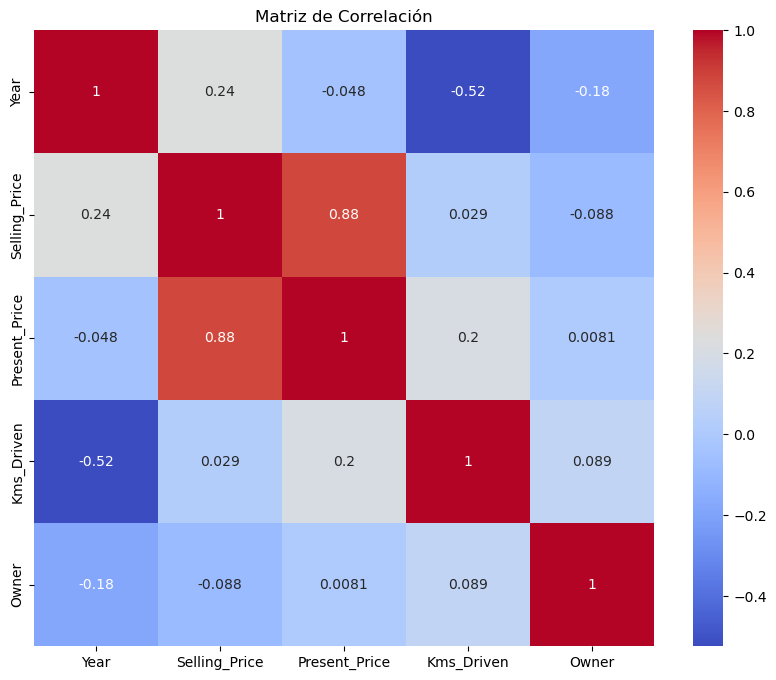

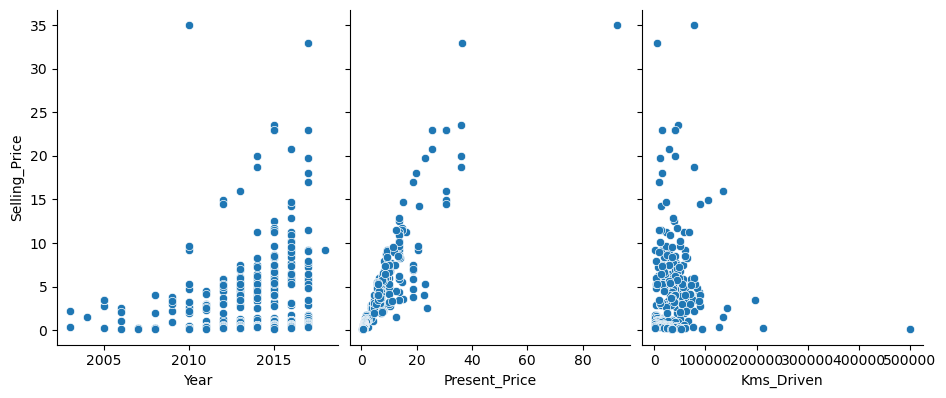

In [29]:
# Filtrar columnas numéricas y calcular la matriz de correlación
numeric_data = vehicle_data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Graficar relaciones entre 'Selling_Price' y otras variables numéricas
sns.pairplot(vehicle_data, x_vars=['Year', 'Present_Price', 'Kms_Driven'], y_vars='Selling_Price', height=4, aspect=0.8)
plt.show()

In [30]:
# Crear la columna de antigüedad
vehicle_data['Age'] = 2024 - vehicle_data['Year']

# Eliminar columnas irrelevantes
vehicle_data.drop(['Car_Name', 'Year'], axis=1, inplace=True)

# Codificar variables categóricas como variables dummy
vehicle_data = pd.get_dummies(vehicle_data, drop_first=True)

# Mostrar las primeras filas del dataset preprocesado
print("\nDataset preprocesado:")
print(vehicle_data.head())


Dataset preprocesado:
   Selling_Price  Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0   10             False   
1           4.75           9.54       43000      0   11              True   
2           7.25           9.85        6900      0    7             False   
3           2.85           4.15        5200      0   13             False   
4           4.60           6.87       42450      0   10              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


In [31]:
# Dividir en características (X) y variable objetivo (y)
X = vehicle_data.drop('Selling_Price', axis=1)
y = vehicle_data['Selling_Price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

In [33]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Evaluación del modelo:
Error cuadrático medio (MSE): 3.478803970637861
Coeficiente de determinación (R²): 0.8489813024899084


C:\Users\Javier Alexander Gar\AppData\Local\Temp\ipykernel_14244\2035721049.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


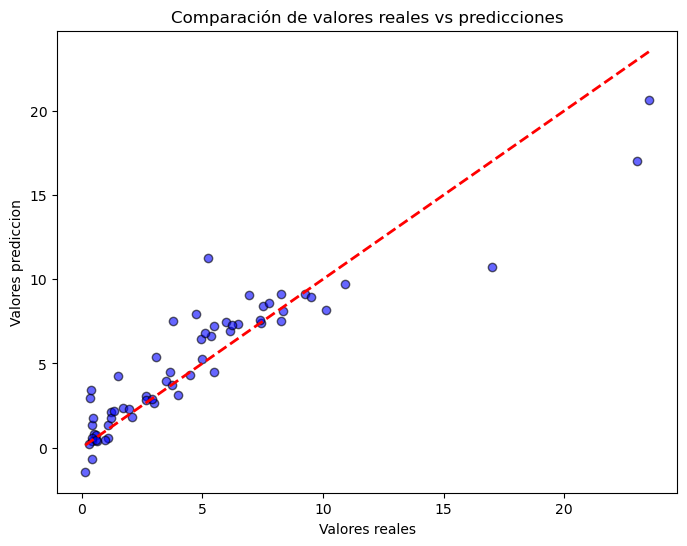

In [39]:
# Comparación de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores prediccion")
plt.title("Comparación de valores reales vs predicciones")
plt.show()

In [35]:
# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coefficients)


Coeficientes del modelo:
                        Coeficiente
Present_Price              0.429153
Kms_Driven                -0.000006
Owner                     -0.903760
Age                       -0.353801
Fuel_Type_Diesel           2.533273
Fuel_Type_Petrol           0.738464
Seller_Type_Individual    -1.190593
Transmission_Manual       -1.639022


In [38]:
# El modelo de regresión lineal para predecir el precio de venta de vehículos explica aproximadamente el 85% 
# de la variabilidad de los datos (𝑅²=0.84898) y presenta un error cuadrático medio (MSE) de 3.4788, 
# indicando un buen desempeño general. Las variables más influyentes incluyen el precio actual del vehículo 
# (Present_Price), con un coeficiente positivo de 0.429, y el tipo de combustible diésel (Fuel_Type_Diesel), 
# que aumenta el precio en 2.53 unidades, mientras que el kilometraje (Kms_Driven), el número de dueños 
# (Owner), la antigüedad (Age) y las transmisiones manuales (Transmission_Manual) tienen impactos negativos menores. 
# Estos resultados sugieren que los vehículos más nuevos, con menor kilometraje, tipo de combustible diésel y vendidos 
# por concesionarios, tienden a tener precios de venta más altos. Sin embargo, el modelo podría beneficiarse de la 
# inclusión de variables adicionales, como la ubicación geográfica o el historial de mantenimiento, para mejorar las 
# predicciones. Además, sería importante analizar los errores residuales para verificar su distribución y considerar 
# posibles relaciones no lineales en futuras investigaciones.